In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('../data/advertising.csv')

# Basic exploration
print("First 5 rows:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

First 5 rows:
       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

Summary Statistics:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.

In [2]:
# Impute missing values with mean (if any)
df.fillna(df.mean(), inplace=True)


In [3]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df[['TV', 'Radio', 'Newspaper']]  # Features
X_scaled = scaler.fit_transform(X)
y = df['Sales']  # Target

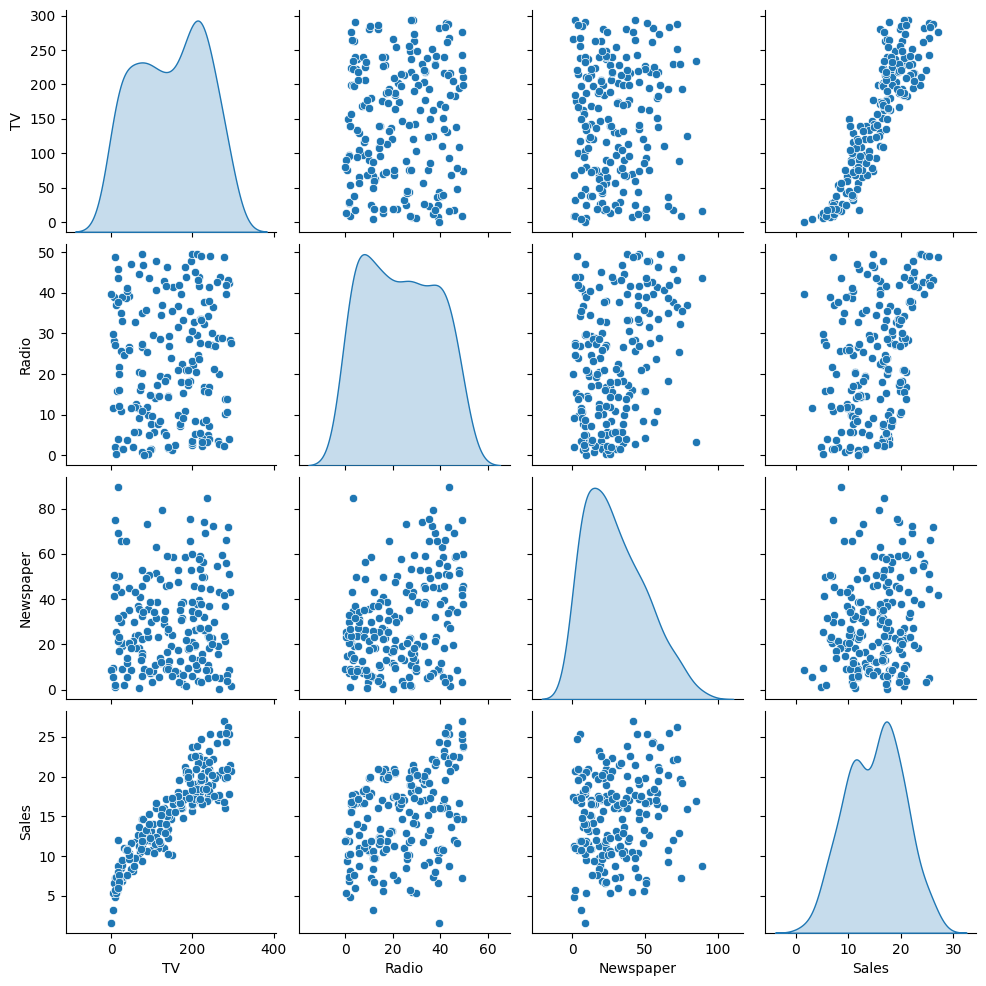

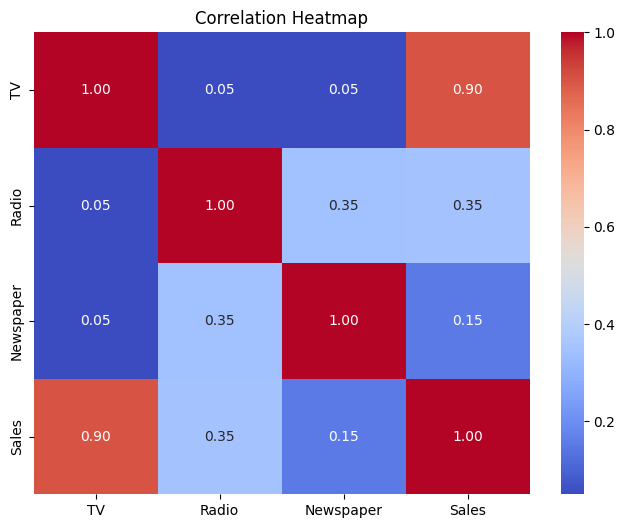

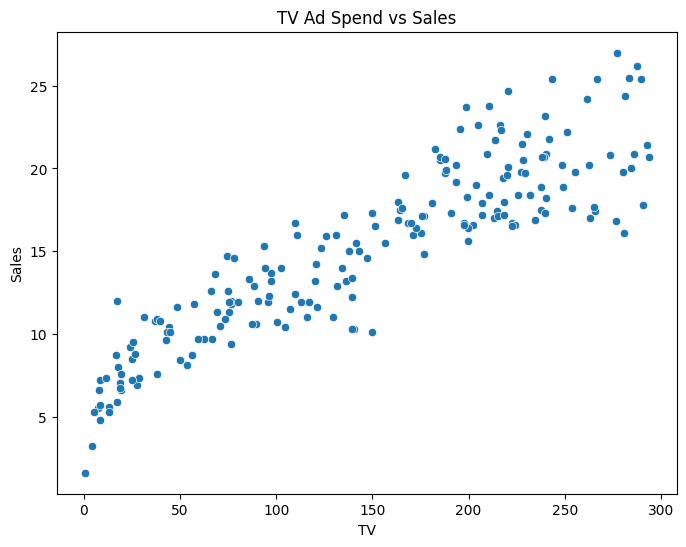

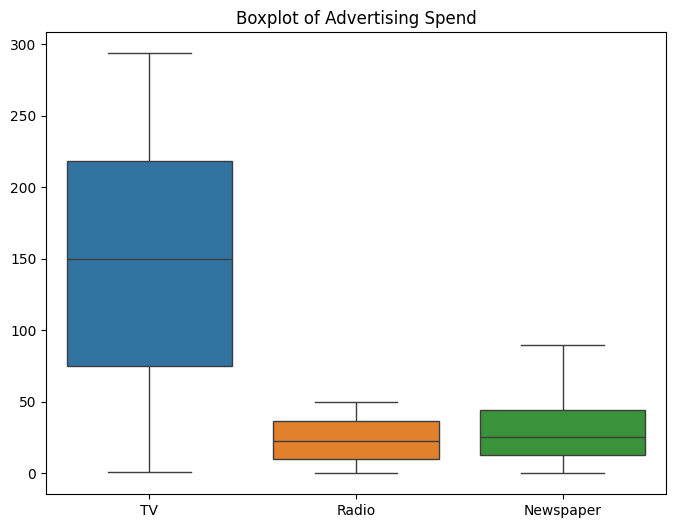

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to see relationships
sns.pairplot(df, diag_kind='kde')
plt.savefig('../images/pairplot.png')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('../images/correlation_heatmap.png')
plt.show()

# Scatter plot: TV vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV Ad Spend vs Sales')
plt.savefig('../images/tv_vs_sales.png')
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['TV', 'Radio', 'Newspaper']])
plt.title('Boxplot of Advertising Spend')
plt.savefig('../images/boxplot.png')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
import joblib
joblib.dump(lr_model, '../models/linear_regression.pkl')
joblib.dump(rf_model, '../models/random_forest.pkl')

['../models/random_forest.pkl']